# Funding sources for clinical trials
##### Note on terminology:
- "Other" means any source of funding that's not from private industry or the US government, so primarily academic medical centers and foundations
- "US Fed" means any source of government funding not from the National Institutes of Health (NIH)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('assets/study_fields.csv')

In [143]:
funded_bys_copy = df['Funded Bys']

In [145]:
df.replace(to_replace=['Other|NIH', 'NIH|Other'], value='Academic & NIH', inplace=True)
df.replace(to_replace=['Other|Industry', 'Industry|Other'], value='Academic & Industry', inplace=True)
df.replace(to_replace=['Industry|NIH', 'NIH|Industry'], value='Industry, NIH', inplace=True)
df.replace(to_replace=['Other|NIH|Industry', 'Other|Industry|NIH'], value='Academic, NIH, Industry', inplace=True)
df.replace(to_replace=['Other'], value='Academic', inplace=True)

In [146]:
# delete columns with NaNs
del df['Interventions']
del df['Outcome Measures']
del df['Study Designs']

In [147]:
df.dropna(axis=0, inplace=True)

In [148]:
interventional = df.loc[df['Study Types'] == 'Interventional']

In [149]:
interventional.Phases.value_counts()

Phase 2            11571
Phase 1             6572
Phase 3             4051
Phase 1|Phase 2     3165
Phase 4             1579
Phase 2|Phase 3      652
Phase 0              504
Name: Phases, dtype: int64

In [150]:
dummies = pd.get_dummies(interventional['Funded Bys'], prefix_sep='')

In [151]:
result = pd.concat([interventional, dummies], axis=1)

In [152]:
phase_funders = result.groupby('Phases').sum()

In [153]:
categories_of_interest = ['NIH', 'Academic & NIH',
                          'Academic & Industry', 'Industry', 'Academic']

In [154]:
big_phase_funders = phase_funders[categories_of_interest]

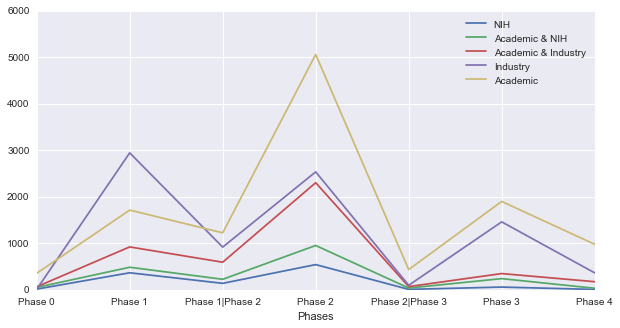

In [155]:
big_phase_funders.plot(figsize=(10,5))

In [156]:
big_phase_funders

,NIH,Academic & NIH,Academic & Industry,Industry,Academic
Phases,,,,,
Phase 0,15.0,51.0,65.0,11.0,355.0
Phase 1,366.0,485.0,922.0,2945.0,1714.0
Phase 1|Phase 2,139.0,226.0,593.0,918.0,1225.0
Phase 2,542.0,953.0,2303.0,2536.0,5061.0
Phase 2|Phase 3,9.0,38.0,69.0,97.0,435.0
Phase 3,59.0,240.0,349.0,1461.0,1900.0
Phase 4,7.0,33.0,174.0,364.0,978.0


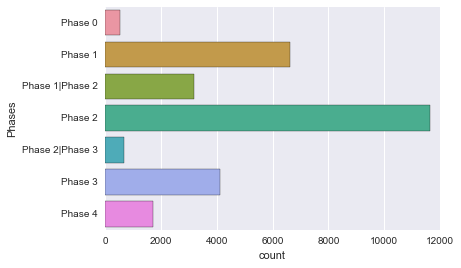

In [157]:
ax = sns.countplot(y='Phases', 
                   data=df, 
                   order=['Phase 0', 'Phase 1', 'Phase 1|Phase 2', 'Phase 2', 'Phase 2|Phase 3', 'Phase 3', 'Phase 4'],)